In [12]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

# L_H & L_He in F4, F5, and F13

In [13]:
import time
import utils
from ppm import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg
import astronomy as ast
%load_ext autoreload
%autoreload 2

cases = []
yprof_paths = {}
yprofs = {}
dump_A = {}
dump_B = {}
res = {}

cases.append('F4')
yprof_paths[cases[-1]] = '/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4'
dump_A[cases[-1]] = 0
dump_B[cases[-1]] = 1959

cases.append('F5')
yprof_paths[cases[-1]] = '/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F5'
dump_A[cases[-1]] = 0
dump_B[cases[-1]] = 1169

cases.append('F13')
yprof_paths[cases[-1]] = '/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F13'
dump_A[cases[-1]] = 1
dump_B[cases[-1]] = 872

for this_case in cases:
    yprofs[this_case] = yprofile(yprof_paths[this_case])
    r = yprofs[this_case].get('Y', fname=0, resolution='l')
    res[this_case] = 2*len(r)

airmu = 1.39165
cldmu = 0.725
fkair = 0.203606102635
fkcld = 0.885906040268
AtomicNoair = 6.65742024965
AtomicNocld = 1.34228187919

cb = utils.colourblind

patience0 = 5
patience = 60

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Reading attributes from file  YProfile-01-1959.bobaaa
Analyzing headers ...
There are 1960 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4 directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0
Reading attributes from file  YProfile-01-1169.bobaaa
Analyzing headers ...
There are 1170 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F5 directory.
Ndump values range from 0 to 1169
Time values range from 86.5493 to 101263.0
Reading attributes from file  YProfile-01-0872.bobaaa
Analyzing headers ...
There are 872 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F13 directory.
Ndump values range from 1 to 872
Time values range from 346.197 to 301884.0
NDump 0 Does not exist in this directory
Reselecting NDump as the largest in the Directory
Which is 872


In [14]:
sparse = 1
dumps = {}
nd = {}
t = {}
L_H = {}
L_He = 2.25*2.98384E-03

for this_case in cases:
    print 'Processing {:s}...'.format(this_case)
    
    dumps[this_case] = np.arange(dump_A[this_case], dump_B[this_case] + 1, sparse)
    nd[this_case] = len(dumps[this_case])
    t[this_case] = np.zeros(nd[this_case])
    L_H[this_case] = np.zeros(nd[this_case])
    
    t00 = time.time()
    t0 = t00
    k = 0
    for i in range(nd[this_case]):
        t[this_case][i] = yprofs[this_case].get('t', fname = dumps[this_case][i], \
                                                resolution = 'l')[-1]
        L_H[this_case][i] = yprofs[this_case].get('L_C12pg', fname = dumps[this_case][i], \
                            resolution = 'l', airmu = airmu, cldmu = cldmu, \
                            fkair = fkair, fkcld = fkcld,  AtomicNoair = AtomicNoair, \
                            AtomicNocld = AtomicNocld, corr_fact = 1.5)

        t_now = time.time()
        if (t_now - t0 >= patience) or \
           ((t_now - t00 < patience) and (t_now - t00 >= patience0) and (k == 0)):
            time_per_dump = (t_now - t00)/float(i + 1)
            time_remaining = (nd[this_case] - i - 1)*time_per_dump
            print 'Processing will be done in {:.0f} s.'.format(time_remaining)
            t0 = t_now
            k += 1

Processing F4...
Processing will be done in 707 s.
Processing will be done in 688 s.
Processing will be done in 648 s.
Processing will be done in 622 s.
Processing will be done in 600 s.
Processing will be done in 578 s.
Processing will be done in 514 s.
Processing will be done in 489 s.
Processing will be done in 460 s.
Processing will be done in 426 s.
Processing will be done in 377 s.
Processing will be done in 342 s.
Processing will be done in 306 s.
Processing will be done in 274 s.
Processing will be done in 238 s.
Processing will be done in 201 s.
Processing will be done in 150 s.
Processing will be done in 113 s.
Processing will be done in 72 s.
Processing will be done in 3 s.
Processing F5...
Processing will be done in 341 s.
Processing will be done in 312 s.
Processing will be done in 274 s.
Processing will be done in 167 s.
Processing will be done in 94 s.
Processing will be done in 37 s.
Processing F13...
Processing will be done in 91 s.
Processing will be done in 63 s.
Pro

<IPython.core.display.Javascript object>


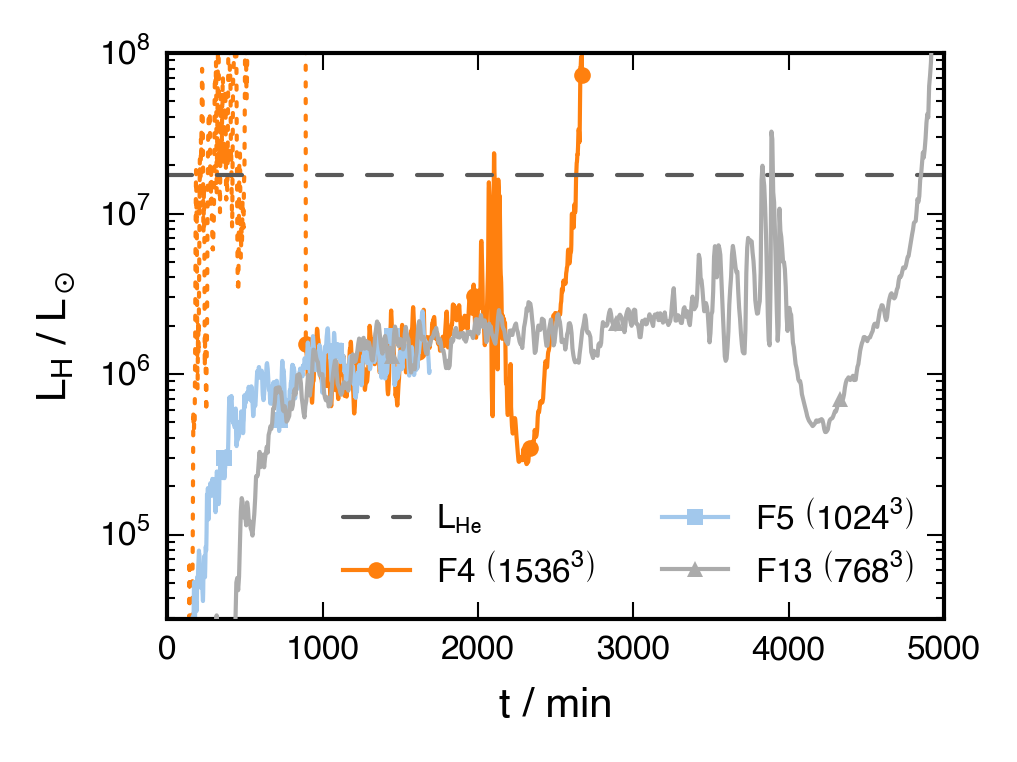

In [15]:
color = [cb(1), cb(0), cb(2)]
zorder = [1, 2, 3]
marker = ['o', 's', '^']

ifig = 1; plt.close(ifig); plt.figure(ifig)
plt.axhline((1e43/ast.lsun_erg_s)*L_He, ls = '--', color = cb(4), \
            label = r'L$_\mathrm{He}$')

k = 0
this_case = 'F4'
lbl = r'{:s} $\left({:d}^3\right)$'.format(this_case, res[this_case])
# The burning was turned on at dump 616, but we want the dotted line to change
# into a solid one inside the plot, where the reader can see it.
idx = np.argmax(dumps[this_case] >= 618)
plt.semilogy(t[this_case][0:idx]/60., (1e43/ast.lsun_erg_s)*L_H[this_case][0:idx], \
             ls = ':', color=color[k], marker=marker[k], markevery=250/sparse, \
             zorder=zorder[k], label='')
plt.semilogy(t[this_case][idx:]/60., (1e43/ast.lsun_erg_s)*L_H[this_case][idx:], \
             color=color[k], marker=marker[k], markevery=250/sparse, \
             zorder=zorder[k], label=lbl)
k += 1

this_case = 'F5'
lbl = r'{:s} $\left({:d}^3\right)$'.format(this_case, res[this_case])
plt.semilogy(t[this_case]/60., (1e43/ast.lsun_erg_s)*L_H[this_case], \
             ls = '-', color=color[k], marker=marker[k], markevery=250/sparse, \
             zorder=zorder[k], label=lbl)
k += 1

this_case = 'F13'
lbl = r'{:s} $\left({:d}^3\right)$'.format(this_case, res[this_case])
plt.semilogy(t[this_case]/60., (1e43/ast.lsun_erg_s)*L_H[this_case], \
             ls = '-', color=color[k], marker=marker[k], markevery=250/sparse, \
             zorder=zorder[k], label=lbl)

special_times = np.array([850, 1500, 2103, 2300])
    
plt.xlabel('t / min')
plt.ylabel(r'L$_H$ / L$_\odot$')
plt.xlim((0., 5e3))
plt.ylim((3e4, 1e8))
plt.legend(loc=0, ncol=2)
plt.tight_layout()
plt.savefig('L_H-L_He_F4_F5_F13.pdf')